In [42]:
import numpy as np
import pandas as pd

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [44]:
train = pd.read_csv('D:/Dataset/titanic_train.csv')

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

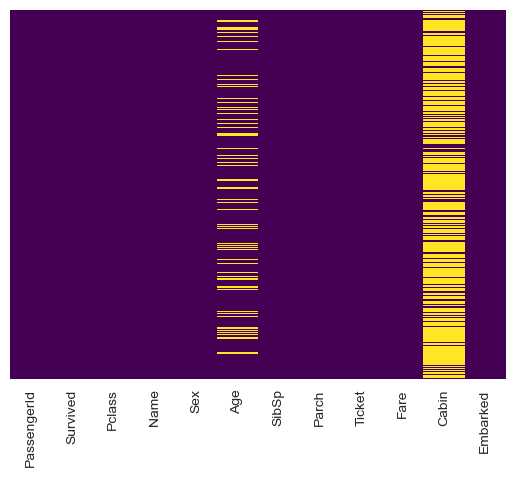

In [47]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

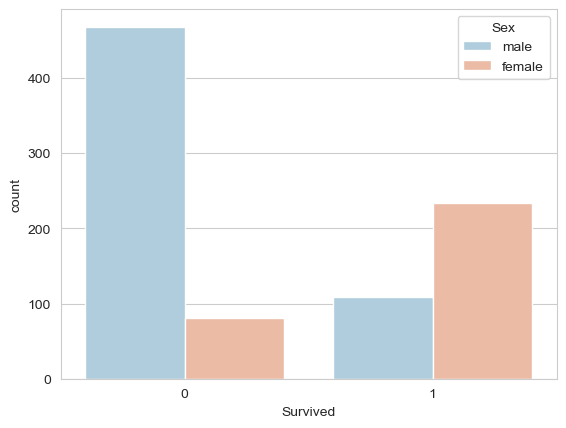

In [49]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

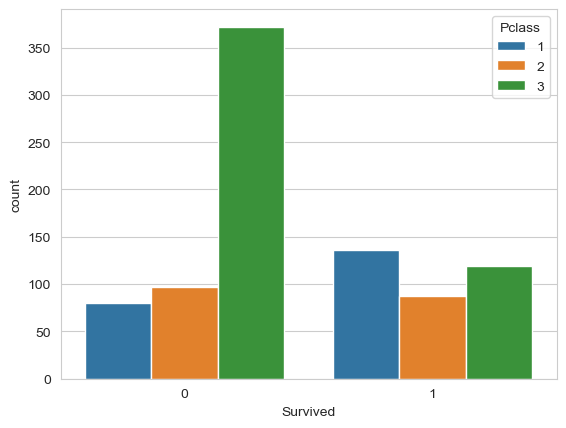

In [50]:
sns.countplot(x='Survived',hue='Pclass',data=train)

C:\Users\sudee\AppData\Local\Temp\ipykernel_4556\2747699129.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age'>

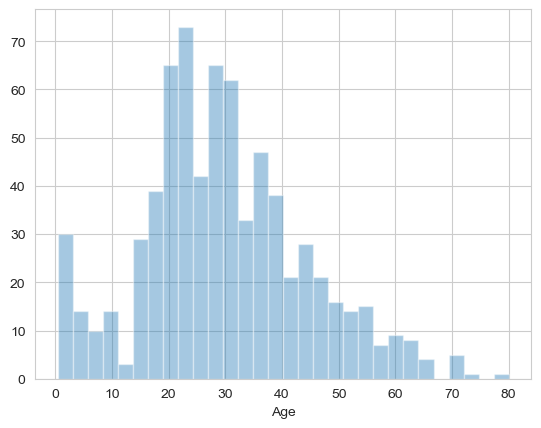

In [51]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

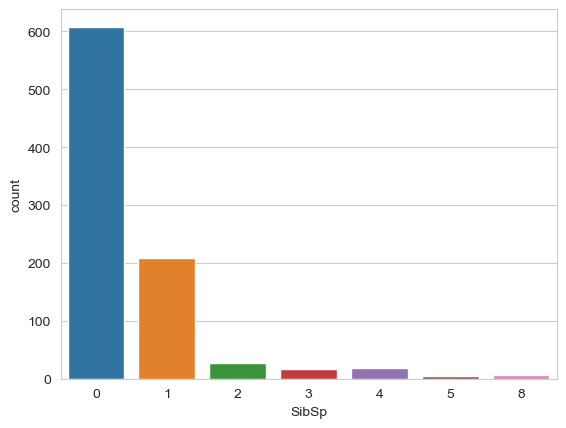

In [52]:
sns.countplot(x='SibSp',data=train)

<Axes: >

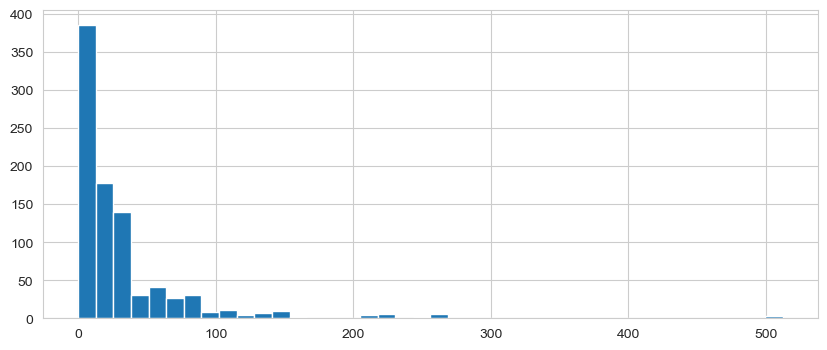

In [53]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [54]:
import cufflinks as cf

In [14]:
cf.go_offline()

In [16]:
#train['Fare'].iplot(kind='hist',bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

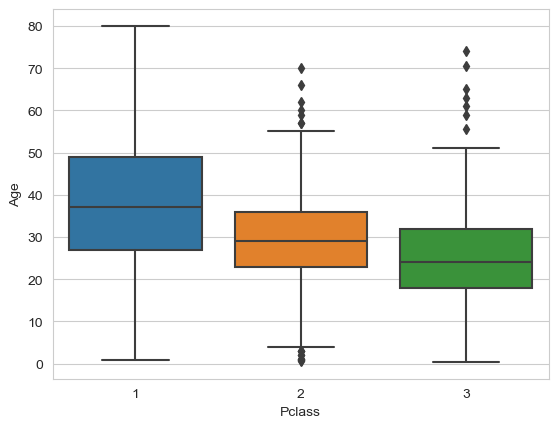

In [55]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [56]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass== 1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
            

In [57]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [21]:
dump = train[['Age','Pclass']].head(2)

In [26]:
def test(data):
    First = data[0]
    Last = data[1]
    print(First, Last)
var = test(data=[[0,1,2,4],['X','Y','Z','W']])

[0, 1, 2, 4] ['X', 'Y', 'Z', 'W']


<Axes: >

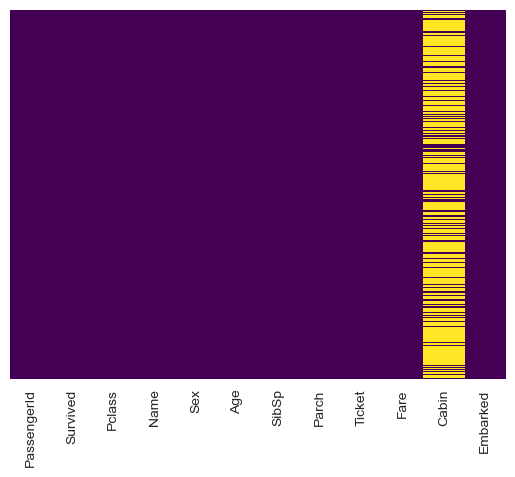

In [58]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
train.drop('Cabin',axis=1,inplace=True)

In [60]:
train.dropna(inplace=True)

In [61]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [62]:
 embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [63]:
train = pd.concat([train,sex,embark],axis=1)

In [64]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [66]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [67]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [70]:
pd.get_dummies(train['Pclass'],drop_first=True)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [71]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
logmodel = LogisticRegression()

In [78]:
logmodel.fit(X_train,y_train)

C:\Users\sudee\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [79]:
predict = logmodel.predict(X_test)

In [80]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [82]:
cdf = pd.DataFrame({'Actual':y_test,'Prediction':predict})

In [83]:
cdf.head() #It's Just for Show Even Though We Don't Analysis in this manner for as it is inefficient to read directly (Graph is better option) 

,Actual,Prediction
511,0,0
613,0,0
615,1,1
337,1,1
718,0,0
